In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
numerical_columns = [
#  'BENE_AGE',
#  'BENE_HI_CVRAGE_TOT_MONS',
#  'BENE_SMI_CVRAGE_TOT_MONS',
 'BENE_HMO_CVRAGE_TOT_MONS',
 'PLAN_CVRG_MOS_NUM',
 'TOTAL_PAY_AMT']
categorical_columns = ['BENE_SEX_IDENT_CD',
 'BENE_RACE_CD',
#  'BENE_ESRD_IND',
 'SP_ALZHDMTA',
 'SP_CHF',
 'SP_CHRNKIDN',
#  'SP_CNCR',
 'SP_COPD',
#  'SP_DEPRESSN',
 'SP_DIABETES',
 'SP_ISCHMCHT',
 'SP_OSTEOPRS',
 'SP_RA_OA',
#  'SP_STRKETIA',
#  'ICD_28521',
#  'ICD_58881',
 'ICD_5990',
#  'ICD_2809',
 'ICD_3051',
 'ICD_311',
 'ICD_5859',
 'ICD_5849',
 'ICD_5856',
 'ICD_27651']


numerical_columns = [
'BENE_AGE',
'BENE_HI_CVRAGE_TOT_MONS',
'BENE_SMI_CVRAGE_TOT_MONS',
'BENE_HMO_CVRAGE_TOT_MONS',
'PLAN_CVRG_MOS_NUM',
'TOTAL_PAY_AMT']
categorical_columns = ['BENE_SEX_IDENT_CD',
'BENE_RACE_CD',
'BENE_ESRD_IND',
'SP_ALZHDMTA',
'SP_CHF',
'SP_CHRNKIDN',
'SP_CNCR',
'SP_COPD',
'SP_DEPRESSN',
'SP_DIABETES',
'SP_ISCHMCHT',
'SP_OSTEOPRS',
'SP_RA_OA',
'SP_STRKETIA',
'ICD_28521',
'ICD_58881',
'ICD_5990',
'ICD_2809',
'ICD_3051',
'ICD_311',
'ICD_5859',
'ICD_5849',
'ICD_5856',
'ICD_27651']

In [3]:
df = pd.read_csv('summ_feed_joined.csv')
#  removed all nulls and infinite values:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# df = df[numerical_columns+categorical_columns]

# minmaxscaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_norm = ['BENE_AGE', 'TOTAL_PAY_AMT','BENE_HI_CVRAGE_TOT_MONS','BENE_SMI_CVRAGE_TOT_MONS','BENE_HMO_CVRAGE_TOT_MONS','PLAN_CVRG_MOS_NUM']

df[cols_to_norm] = scaler.fit_transform(df[cols_to_norm])
df
# 



/tmp/ipykernel_12251/1358466447.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


,DESYNPUF_ID,OPIOID_HARMED,BENE_SEX_IDENT_CD,BENE_AGE,BENE_RACE_CD,BENE_ESRD_IND,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,...,ICD_58881,ICD_5990,ICD_2809,ICD_3051,ICD_311,ICD_5859,ICD_5849,ICD_5856,ICD_27651,TOTAL_PAY_AMT
0,3951A55F8A5682D3,1,1,0.256757,1,0,1.00,1.00,0.0,1.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.965154
1,39898ACF8B8DF7BB,1,2,0.972973,1,0,1.00,1.00,0.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.965655
2,7C7CF7C730043552,1,2,0.094595,1,0,0.25,0.25,0.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.964939
3,800C1A2D55B31C97,1,2,0.608108,3,0,1.00,1.00,0.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.965655
4,804A02EA8F3AEF6B,1,1,0.297297,1,0,1.00,1.00,0.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.967086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,E5753493DCDF3532,0,2,0.121622,2,0,1.00,1.00,1.0,1.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.961433
804,ED1CC041280181ED,0,1,0.783784,1,0,1.00,1.00,0.0,0.00,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.906009
805,EF0E074B9F7625A4,0,1,0.540541,1,0,1.00,1.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.966156
806,F3B93FD9C345F93A,0,2,0.378378,1,0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.963007


In [4]:
# onehotencoding: use only for trees!
# race, sex 
X_variables = df[numerical_columns+categorical_columns]

X_encoded = pd.get_dummies(X_variables, columns = ['BENE_SEX_IDENT_CD','BENE_RACE_CD'], dtype = float)
# X_variables

In [5]:
X_variables

,BENE_AGE,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,TOTAL_PAY_AMT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_ALZHDMTA,...,ICD_28521,ICD_58881,ICD_5990,ICD_2809,ICD_3051,ICD_311,ICD_5859,ICD_5849,ICD_5856,ICD_27651
0,0.256757,1.00,1.00,0.0,1.00,0.965154,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.972973,1.00,1.00,0.0,1.00,0.965655,2,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.094595,0.25,0.25,0.0,0.25,0.964939,2,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.608108,1.00,1.00,0.0,1.00,0.965655,2,3,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.297297,1.00,1.00,0.0,1.00,0.967086,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,0.121622,1.00,1.00,1.0,1.00,0.961433,2,2,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804,0.783784,1.00,1.00,0.0,0.00,0.906009,1,1,0,1,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
805,0.540541,1.00,1.00,0.0,0.00,0.966156,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,0.378378,0.00,0.00,0.0,0.00,0.963007,2,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [7]:
vif_data

,feature,VIF
0,BENE_AGE,14.396198
1,BENE_HI_CVRAGE_TOT_MONS,121.317926
2,BENE_SMI_CVRAGE_TOT_MONS,90.224901
3,BENE_HMO_CVRAGE_TOT_MONS,1.537121
4,PLAN_CVRG_MOS_NUM,5.091859
5,TOTAL_PAY_AMT,37.878791
6,BENE_SEX_IDENT_CD,11.823896
7,BENE_RACE_CD,3.995048
8,BENE_ESRD_IND,1.903238
9,SP_ALZHDMTA,1.867865


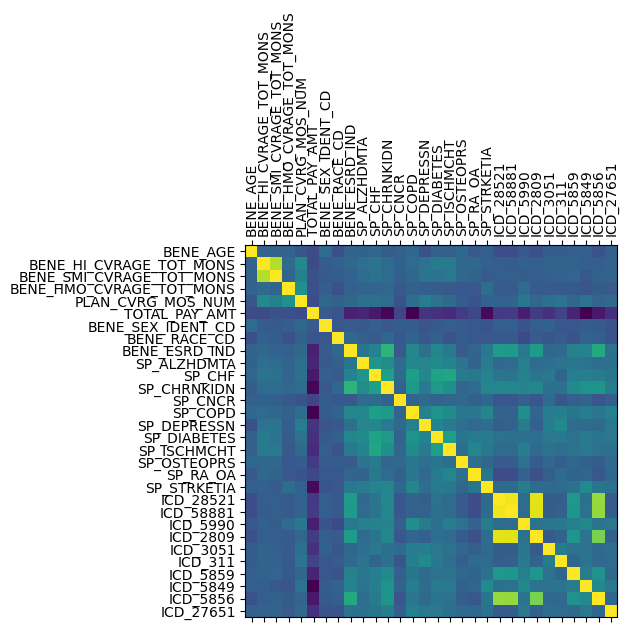

In [8]:
import matplotlib.pyplot as plt
plt.matshow(X_variables.corr())
plt.xticks(range(len(X_variables.corr().columns)), X_variables.corr().columns, rotation = 'vertical')
plt.yticks(range(len(X_variables.corr().columns)), X_variables.corr().columns)

plt.show()

In [9]:
X_variables.corr()

,BENE_AGE,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,TOTAL_PAY_AMT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_ALZHDMTA,...,ICD_28521,ICD_58881,ICD_5990,ICD_2809,ICD_3051,ICD_311,ICD_5859,ICD_5849,ICD_5856,ICD_27651
BENE_AGE,1.000000,0.057832,0.056908,0.064536,-0.006592,-0.056263,0.107320,-0.041363,0.066295,0.051943,...,-0.044017,-0.047893,0.011525,-0.032421,0.025015,0.025709,0.033836,0.048600,-0.028319,0.048360
BENE_HI_CVRAGE_TOT_MONS,0.057832,1.000000,0.847040,0.094075,0.272572,-0.058298,0.020659,0.050672,0.080208,0.131809,...,0.034449,0.028615,0.054065,0.039798,0.065867,0.070818,0.068807,0.038596,0.034899,0.056084
BENE_SMI_CVRAGE_TOT_MONS,0.056908,0.847040,1.000000,0.074737,0.216401,-0.034919,0.008625,0.031941,0.059038,0.113836,...,0.039056,0.035267,0.033668,0.044213,0.050479,0.056965,0.076462,0.003080,0.046590,0.069306
BENE_HMO_CVRAGE_TOT_MONS,0.064536,0.094075,0.074737,1.000000,0.316691,-0.039297,0.038113,-0.034065,0.048652,0.070620,...,0.019720,0.019857,0.104265,0.023212,0.021154,0.013134,0.015240,-0.007180,0.028919,0.022170
PLAN_CVRG_MOS_NUM,-0.006592,0.272572,0.216401,0.316691,1.000000,-0.045206,0.091214,0.054347,0.091335,0.131293,...,0.059788,0.066719,0.164901,0.079155,0.129397,0.146602,0.074395,0.145117,0.075795,0.101895
TOTAL_PAY_AMT,-0.056263,-0.058298,-0.034919,-0.039297,-0.045206,1.000000,0.018449,-0.012734,-0.250314,-0.227613,...,-0.144553,-0.136264,-0.258223,-0.137247,-0.176919,-0.097555,-0.232640,-0.372065,-0.282587,-0.188750
BENE_SEX_IDENT_CD,0.107320,0.020659,0.008625,0.038113,0.091214,0.018449,1.000000,-0.002109,0.020260,0.017113,...,0.038109,0.038078,-0.019059,0.034459,0.050219,0.000983,-0.002965,0.021594,0.015001,-0.022460
BENE_RACE_CD,-0.041363,0.050672,0.031941,-0.034065,0.054347,-0.012734,-0.002109,1.000000,0.084630,0.047103,...,0.003108,0.014296,-0.063815,0.020167,-0.005292,0.018464,-0.021762,0.055749,0.038529,-0.015267
BENE_ESRD_IND,0.066295,0.080208,0.059038,0.048652,0.091335,-0.250314,0.020260,0.084630,1.000000,0.158596,...,0.382766,0.370195,0.176678,0.378744,0.089626,0.097497,0.227084,0.236607,0.460091,0.142579
SP_ALZHDMTA,0.051943,0.131809,0.113836,0.070620,0.131293,-0.227613,0.017113,0.047103,0.158596,1.000000,...,0.095026,0.107366,0.217967,0.104927,0.127820,0.156635,0.163057,0.160400,0.119464,0.132452


In [10]:
from sklearn.model_selection import train_test_split
X = X_encoded
y = df['OPIOID_HARMED']

X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 0, stratify=y)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [11]:
lr.coef_


array([[-0.34732498,  0.        , -0.2444588 , -0.05285096,  2.03028672,
        -1.99401186,  0.08634461, -0.23179716,  0.        , -0.04869517,
        -0.27458025,  0.26137109,  0.53739755,  0.24485809,  0.0525556 ,
         0.02998566,  0.06170546, -0.13575789, -0.20913109,  0.08626714,
         0.18545157,  0.0242042 ,  0.31935596,  0.3151719 ,  0.25330434,
         0.35434908,  0.56852391,  1.19928649, -0.05452161,  0.        ,
        -0.28699018,  0.17951639, -0.40794065,  0.        ]])

In [12]:
# ridge
ridge = LogisticRegression(penalty='l2')
ridge.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Make prediction
lasso_prediction = lr.predict(X_val)
# Get predicted probability
lasso_pred_Prob = lr.predict_proba(X_val)[:,1]

In [14]:
# Make prediction
ridge_prediction = ridge.predict(X_val)
# Get predicted probability
ridge_pred_Prob = ridge.predict_proba(X_val)[:,1]

0.8084486166007905


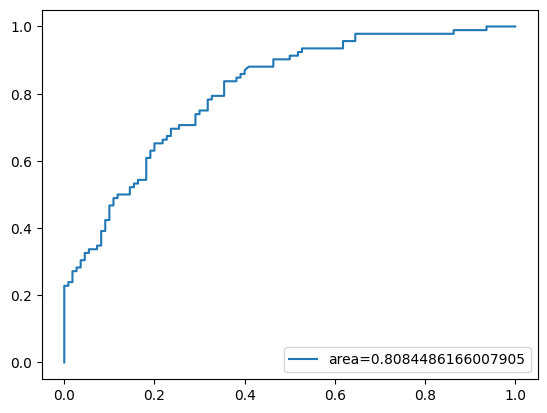

In [15]:

from sklearn.metrics import plot_confusion_matrix, classification_report, log_loss, roc_curve, roc_auc_score
# Get the false positive rate and true positive rate
fpr,tpr, _= roc_curve(y_val,lasso_pred_Prob)
# Get auc value
auc = roc_auc_score(y_val,lasso_pred_Prob)
print(auc)
# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

0.8084486166007905


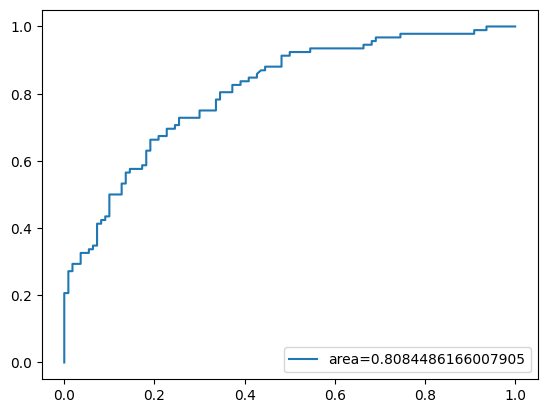

In [16]:

from sklearn.metrics import plot_confusion_matrix, classification_report, log_loss, roc_curve, roc_auc_score
# Get the false positive rate and true positive rate
fpr,tpr, _= roc_curve(y_val,ridge_pred_Prob)
# Get auc value
auc = roc_auc_score(y_val,ridge_pred_Prob)
print(auc)
# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


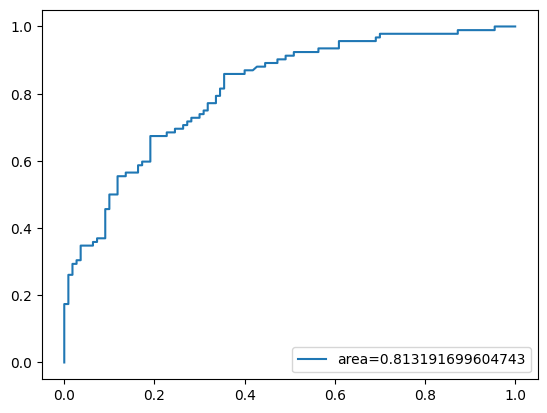

In [17]:
# Run model
elasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5).fit(X_train, y_train)
# Make prediction
elasticNet_prediction = elasticNet.predict(X_val)
# Get predicted probability
elasticNet_pred_Prob = elasticNet.predict_proba(X_val)[:,1]
# Get the false positive rate and true positive rate
fpr,tpr, _ = roc_curve(y_val,elasticNet_pred_Prob)
# Get auc value
auc = roc_auc_score(y_val,elasticNet_pred_Prob)
# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

In [18]:
# Calculate log loss
log_loss(y_val,elasticNet_pred_Prob), log_loss(y_val,ridge_pred_Prob), log_loss(y_val, lasso_pred_Prob)

(0.5234042769073806, 0.5256137696657976, 0.5264924961581382)

/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


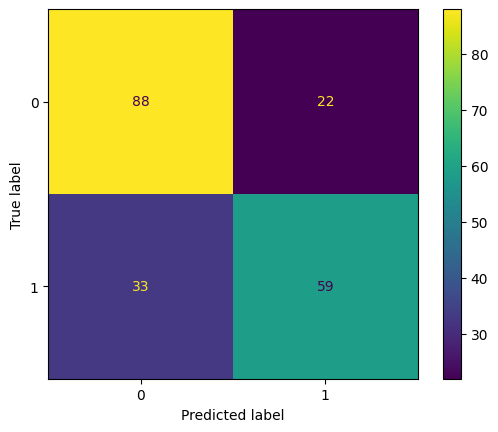

In [19]:
plot_confusion_matrix(lr, X_val,y_val)

/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


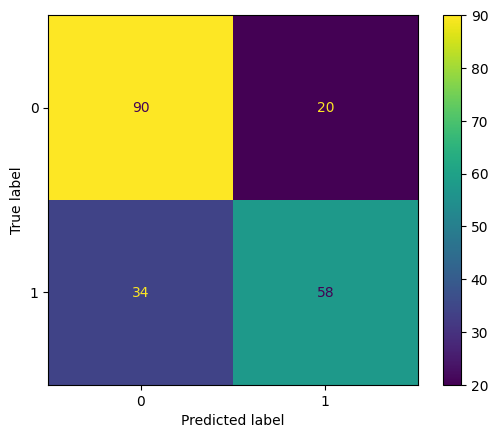

In [20]:
plot_confusion_matrix(ridge, X_val,y_val)


/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


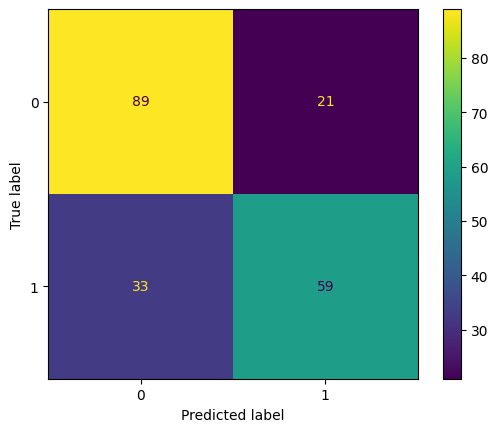

In [21]:
# Confusion matrix
plot_confusion_matrix(elasticNet, X_val, y_val)

In [22]:
print('lasso\n',classification_report(y_val, lasso_prediction, digits=3))
print('ridge\n',classification_report(y_val, ridge_prediction, digits=3))
print('elastic\n',classification_report(y_val, elasticNet_prediction, digits=3))

lasso
               precision    recall  f1-score   support

           0      0.727     0.800     0.762       110
           1      0.728     0.641     0.682        92

    accuracy                          0.728       202
   macro avg      0.728     0.721     0.722       202
weighted avg      0.728     0.728     0.726       202

ridge
               precision    recall  f1-score   support

           0      0.726     0.818     0.769       110
           1      0.744     0.630     0.682        92

    accuracy                          0.733       202
   macro avg      0.735     0.724     0.726       202
weighted avg      0.734     0.733     0.730       202

elastic
               precision    recall  f1-score   support

           0      0.730     0.809     0.767       110
           1      0.738     0.641     0.686        92

    accuracy                          0.733       202
   macro avg      0.734     0.725     0.727       202
weighted avg      0.733     0.733     0.730       2

In [23]:
# Model coefficients
lassoCoeff = pd.concat([pd.DataFrame(X_val.columns),
                       pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
lassoCoeff.columns=['Variable','Coefficient']
lassoCoeff['Coefficient_Abs']=lassoCoeff['Coefficient'].apply(abs)
lassoCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
4,PLAN_CVRG_MOS_NUM,2.030287,2.030287
5,TOTAL_PAY_AMT,-1.994012,1.994012
27,ICD_27651,1.199286,1.199286
26,ICD_5856,0.568524,0.568524
12,SP_DEPRESSN,0.537398,0.537398
32,BENE_RACE_CD_3,-0.407941,0.407941
25,ICD_5849,0.354349,0.354349
0,BENE_AGE,-0.347325,0.347325
22,ICD_3051,0.319356,0.319356
23,ICD_311,0.315172,0.315172


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

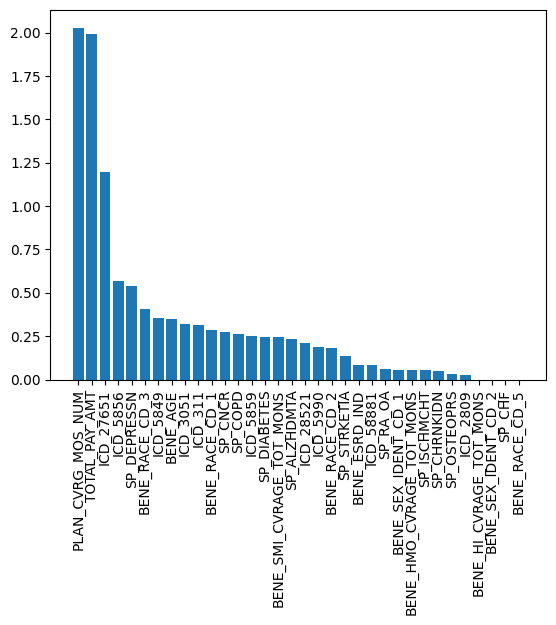

In [34]:
# plt.bar(lassoCoeff.sort_values(by='Coefficient_Abs', ascending=False))
lfbar = lassoCoeff.sort_values(by='Coefficient_Abs', ascending=False).reset_index(drop=True)
plt.bar(lfbar.Variable, lfbar.Coefficient_Abs)
plt.xticks(rotation='vertical')

In [ ]:
# Model coefficients
ridgeCoeff = pd.concat([pd.DataFrame(X_val.columns),
                       pd.DataFrame(np.transpose(ridge.coef_))], axis = 1)
ridgeCoeff.columns=['Variable','Coefficient']
ridgeCoeff['Coefficient_Abs']=ridgeCoeff['Coefficient'].apply(abs)
ridgeCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
4,PLAN_CVRG_MOS_NUM,1.983368,1.983368
27,ICD_27651,1.190446,1.190446
5,TOTAL_PAY_AMT,-0.838310,0.838310
26,ICD_5856,0.595063,0.595063
12,SP_DEPRESSN,0.556958,0.556958
25,ICD_5849,0.450529,0.450529
10,SP_CNCR,-0.396558,0.396558
31,BENE_RACE_CD_2,0.384995,0.384995
32,BENE_RACE_CD_3,-0.380019,0.380019
18,ICD_28521,-0.362166,0.362166


In [ ]:
# Model coefficients
elasticNetCoeff = pd.concat([pd.DataFrame(X_val.columns),
                             pd.DataFrame(np.transpose(elasticNet.coef_))], axis = 1)
elasticNetCoeff.columns=['Variable','Coefficient']
elasticNetCoeff['Coefficient_Abs']=elasticNetCoeff['Coefficient'].apply(abs)
elasticNetCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
4,PLAN_CVRG_MOS_NUM,1.824928,1.824928
27,ICD_27651,1.034562,1.034562
5,TOTAL_PAY_AMT,-0.694882,0.694882
12,SP_DEPRESSN,0.551844,0.551844
26,ICD_5856,0.508693,0.508693
25,ICD_5849,0.452531,0.452531
0,BENE_AGE,-0.412915,0.412915
32,BENE_RACE_CD_3,-0.356657,0.356657
11,SP_COPD,0.336640,0.336640
22,ICD_3051,0.335767,0.335767


In [ ]:
# example of grid searching key hyperparameters for LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = LogisticRegression()
# scoring=accuracy
# n_estimators = [80,100,120]
# max_features = [8,10, 12]
# max_depth = [7,16]
# min_samples_leaf = [4,5,6]
C = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1','l2', 'elasticnet']
# penalty = ['elasticnet']

grid = dict(C=C, penalty=penalty, solver=['saga','liblinear','lbfgs'], l1_ratio = [0.25,0.5,0.75])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got 

Best: 0.814220 using {'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
0.500000 (0.000000) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'l1', 'solver': 'saga'}
0.500000 (0.000000) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'l1', 'solver': 'lbfgs'}
0.776004 (0.050547) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'l2', 'solver': 'saga'}
0.782029 (0.049975) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'l2', 'solver': 'liblinear'}
0.775962 (0.050530) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'l2', 'solver': 'lbfgs'}
0.500000 (0.000000) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'elasticnet', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.500000 (0.000000) with: {'C': 0.001,

/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# from sklearn.metrics import get_scorer_names
# get_scorer_names()

In [ ]:
from xgboost import XGBClassifier   

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', seed=42)
xgb.fit(X_train,y_train,
        early_stopping_rounds =10,
        eval_metric = 'aucpr',
        eval_set = [(X_val, y_val)])


[0]	validation_0-aucpr:0.70961
[1]	validation_0-aucpr:0.72259
[2]	validation_0-aucpr:0.73564
[3]	validation_0-aucpr:0.73479
[4]	validation_0-aucpr:0.72948
[5]	validation_0-aucpr:0.71402
[6]	validation_0-aucpr:0.72412


/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-aucpr:0.73416
[8]	validation_0-aucpr:0.72601
[9]	validation_0-aucpr:0.72478
[10]	validation_0-aucpr:0.72835
[11]	validation_0-aucpr:0.73328
[12]	validation_0-aucpr:0.73563


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


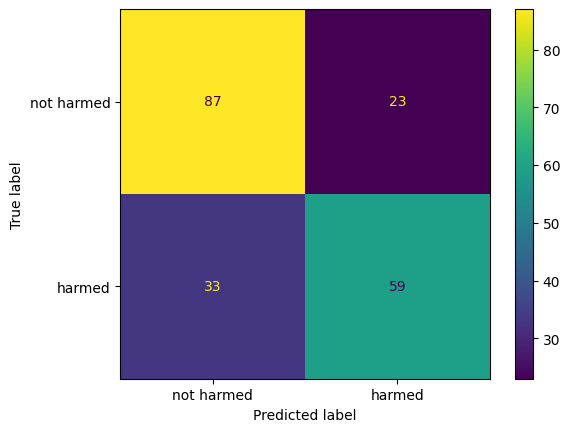

In [ ]:
# conf matrix
plot_confusion_matrix(xgb, X_val,y_val, values_format = 'd', display_labels=['not harmed', 'harmed'])

In [ ]:
# dset inmbalanced => scale_pos_weight helps with imbalanced data
# use gridsearch()
# r1
param_grid = {
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0.0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight': [1,2]
}
# {'gamma': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'reg_lambda': 0, 'scale_pos_weight': 2}
# r2
param_grid = {
    'max_depth':[2,3,4],
    'learning_rate':[0.025,0.05,0.1],
    'gamma':[1.3,0.5,1.0],
    'reg_lambda':[0,0.3,0.2],
    'scale_pos_weight': [1,2]
}
# {'gamma': 1.3, 'learning_rate': 0.05, 'max_depth': 2, 'reg_lambda': 0.3, 'scale_pos_weight': 2}
# # r3
param_grid = { 
    'gamma':[1.2,1.3,1.4],
    'learning_rate':[0.025,0.05,0.075],
    'max_depth':[2,3,4],
    'reg_lambda':[0.15,0.3,0.45],
    'scale_pos_weight': [1,2]
}
# {'gamma': 1.5, 'learning_rate': 0.01, 'max_depth': 4, 'reg_lambda': 0, 'scale_pos_weight': 1}
# r4
# param_grid = {
#     'max_depth':[4],
#     'learning_rate':[0.009,0.01,0.011],
#     'gamma':[1.4,1.5,1.6],
#     'reg_lambda':[0],
#     'scale_pos_weight': [1]
# }
optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective='binary:logistic',
                            seed=42,
                            subsample = 0.9,
                            colsample_bytree=0.5,
                            eval_metric= 'auc',
                            early_stopping_rounds = 10),
    param_grid=param_grid,
    scoring = 'recall',
    verbose=0,
    n_jobs = -1,
    cv = 3
)
optimal_params.fit(X_train,y_train, eval_set = [(X_val,y_val)],verbose = False)
print(optimal_params.best_params_)

{'gamma': 1.2, 'learning_rate': 0.025, 'max_depth': 2, 'reg_lambda': 0.15, 'scale_pos_weight': 2}


In [ ]:
# dset inmbalanced => scale_pos_weight helps with imbalanced data
# use gridsearch() 
# for f1
# r1
param_grid = {
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0.0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight': [1,2]
}
# {'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 0, 'scale_pos_weight': 2}
# r2
param_grid = {
    'gamma':[1.2,1.0,0.8],
    'learning_rate':[0.075,0.1,0.125],
    'max_depth':[2,3,4],
    'reg_lambda':[0,0.1,0.15],
    'scale_pos_weight': [1,2]

}
# {'gamma': 1.0, 'learning_rate': 0.075, 'max_depth': 4, 'reg_lambda': 0.1, 'scale_pos_weight': 2}
# # r3
param_grid = { 
    'gamma':[0.9,1,1.1],
    'learning_rate':[0.06,0.075,0.8],
    'max_depth':[3,4,5],
    'reg_lambda':[0.075,0.1,0.125],
    'scale_pos_weight': [2]
}
# {'gamma': 1.1, 'learning_rate': 0.075, 'max_depth': 3, 'reg_lambda': 0.125, 'scale_pos_weight': 2}
# r4
param_grid = { 
    'gamma':[1.05,1.1,1.15],
    'learning_rate':[0.06,0.075,0.8],
    'max_depth':[3,4],
    'reg_lambda':[0.12,0.125,0.13],
    'scale_pos_weight': [2]
}
optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective='binary:logistic',
                            seed=42,
                            subsample = 0.6,
                            colsample_bytree=0.5,
                            eval_metric= 'auc',
                            early_stopping_rounds = 10),
    param_grid=param_grid,
    scoring = 'f1',
    verbose=0,
    n_jobs = -1,
    cv = 3
)
optimal_params.fit(X_train,y_train, eval_set = [(X_val,y_val)],verbose = False)
print(optimal_params.best_params_)

{'gamma': 1.05, 'learning_rate': 0.075, 'max_depth': 4, 'reg_lambda': 0.12, 'scale_pos_weight': 2}


In [ ]:
# dset inmbalanced => scale_pos_weight helps with imbalanced data
# use gridsearch() 
# for precision
# r1
param_grid = {
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0.0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight': [1,2]
}
# {'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 1.0, 'scale_pos_weight': 1}
# # r2
param_grid = {
    'gamma':[1.2,1.0,0.8],
    'learning_rate':[0.075,0.1,0.125],
    'max_depth':[2,3,4],
    'reg_lambda':[0.5,1,1.5],
    'scale_pos_weight': [1,2]

}
# {'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 1, 'scale_pos_weight': 1}
# # # r3
param_grid = { 
    'gamma':[0.9,1,1.1],
    'learning_rate':[1.1,1.0,0.9],
    'max_depth':[2,3],
    'reg_lambda':[0.75,1,1.25],
    'scale_pos_weight': [1]
}
# {'gamma': 1.1, 'learning_rate': 0.9, 'max_depth': 3, 'reg_lambda': 1, 'scale_pos_weight': 1
# # r4
param_grid = { 
    'gamma':[1.05,1.1,1.15],
    'learning_rate':[0.85,0.9,0.95],
    'max_depth':[3],
    'reg_lambda':[0.9,1,1.1],
    'scale_pos_weight': [110/92,1,1.2]
}
optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective='binary:logistic',
                            seed=42,
                            subsample = 0.6,
                            colsample_bytree=0.5,
                            eval_metric= 'auc',
                            early_stopping_rounds = 10),
    param_grid=param_grid,
    scoring = 'precision',
    verbose=0,
    n_jobs = -1,
    cv = 3
)
optimal_params.fit(X_train,y_train, eval_set = [(X_val,y_val)],verbose = False)
print(optimal_params.best_params_)

{'gamma': 1.05, 'learning_rate': 0.95, 'max_depth': 3, 'reg_lambda': 1, 'scale_pos_weight': 1}


In [ ]:
# recall: {'gamma': 1.2, 'learning_rate': 0.05, 'max_depth': 2, 'reg_lambda': 0.15, 'scale_pos_weight': 2}
# precision:{'gamma': 1.1, 'learning_rate': 0.9, 'max_depth': 3, 'reg_lambda': 1, 'scale_pos_weight': 1}
# f1: gamma = 1.1, learning_rate = 0.075, max_depth = 3, reg_lambda= 0.125, scale_pos_weight =2)

xgb = XGBClassifier(objective='binary:logistic', seed=42,
                    gamma = 1.1, learning_rate = 0.075, max_depth = 3, reg_lambda= 0.125, scale_pos_weight =2)
                    
xgb.fit(X_train,y_train,
        early_stopping_rounds =10,
        eval_metric = 'auc',
        eval_set = [(X_val, y_val)])

[0]	validation_0-auc:0.72955
[1]	validation_0-auc:0.72861
[2]	validation_0-auc:0.74155
[3]	validation_0-auc:0.74921
[4]	validation_0-auc:0.75173
[5]	validation_0-auc:0.76008
[6]	validation_0-auc:0.77490
[7]	validation_0-auc:0.77372
[8]	validation_0-auc:0.77376
[9]	validation_0-auc:0.77663
[10]	validation_0-auc:0.77940
[11]	validation_0-auc:0.78533
[12]	validation_0-auc:0.78533
[13]	validation_0-auc:0.78928
[14]	validation_0-auc:0.79229
[15]	validation_0-auc:0.78715
[16]	validation_0-auc:0.78617
[17]	validation_0-auc:0.79091
[18]	validation_0-auc:0.78977
[19]	validation_0-auc:0.78918
[20]	validation_0-auc:0.79037
[21]	validation_0-auc:0.79486
[22]	validation_0-auc:0.79644
[23]	validation_0-auc:0.79437
[24]	validation_0-auc:0.79783
[25]	validation_0-auc:0.79862
[26]	validation_0-auc:0.80217


/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-auc:0.80277
[28]	validation_0-auc:0.79960
[29]	validation_0-auc:0.80054
[30]	validation_0-auc:0.80114
[31]	validation_0-auc:0.80282
[32]	validation_0-auc:0.80163
[33]	validation_0-auc:0.79965
[34]	validation_0-auc:0.80193
[35]	validation_0-auc:0.80331
[36]	validation_0-auc:0.80618
[37]	validation_0-auc:0.80598
[38]	validation_0-auc:0.80820
[39]	validation_0-auc:0.80820
[40]	validation_0-auc:0.81008
[41]	validation_0-auc:0.80939
[42]	validation_0-auc:0.81003
[43]	validation_0-auc:0.81052
[44]	validation_0-auc:0.81324
[45]	validation_0-auc:0.81255
[46]	validation_0-auc:0.81146
[47]	validation_0-auc:0.81186
[48]	validation_0-auc:0.81225
[49]	validation_0-auc:0.81225
[50]	validation_0-auc:0.81215
[51]	validation_0-auc:0.81472
[52]	validation_0-auc:0.81611
[53]	validation_0-auc:0.81739
[54]	validation_0-auc:0.81645
[55]	validation_0-auc:0.81655
[56]	validation_0-auc:0.81833
[57]	validation_0-auc:0.81882
[58]	validation_0-auc:0.81793
[59]	validation_0-auc:0.81734
[60]	valid

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.075, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=0.125, ...)

In [ ]:
# Make prediction
xgb_prediction = xgb.predict(X_val)
# Get predicted probability
xgb_pred_Prob = xgb.predict_proba(X_val)[:,1]

              precision    recall  f1-score   support

           0       0.87      0.63      0.73       110
           1       0.67      0.89      0.76        92

    accuracy                           0.75       202
   macro avg       0.77      0.76      0.75       202
weighted avg       0.78      0.75      0.75       202
 
confusion_matrix:
 [[69 41]
 [10 82]]


/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.6666666666666666

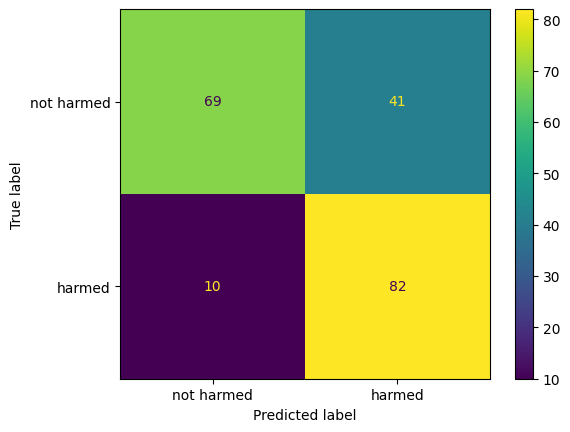

In [ ]:
from sklearn.metrics import  precision_score, recall_score, f1_score, confusion_matrix
plot_confusion_matrix(xgb, X_val,y_val, values_format = 'd', display_labels=['not harmed', 'harmed'])
# print('precision\n',precision_score(y_val, xgb_prediction),'\nrecall\n',recall_score(y_val, xgb_prediction),'\nf1\n',f1_score(y_val,xgb_prediction),'\nconfusion matrix\n', confusion_matrix(y_val,xgb_prediction))
print(classification_report(y_val,xgb_prediction),'\nconfusion_matrix:\n',confusion_matrix(y_val,xgb_prediction))
precision_score(y_val, xgb_prediction)

0.8188241106719368


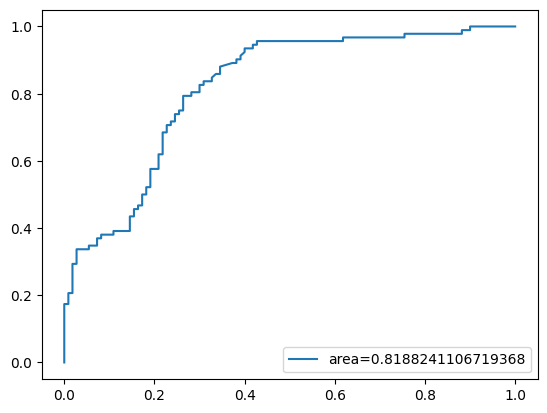

In [ ]:
# Get the false positive rate and true positive rate
fpr,tpr, _= roc_curve(y_val,xgb_pred_Prob)
# Get auc value
auc = roc_auc_score(y_val,xgb_pred_Prob)
print(auc)
# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

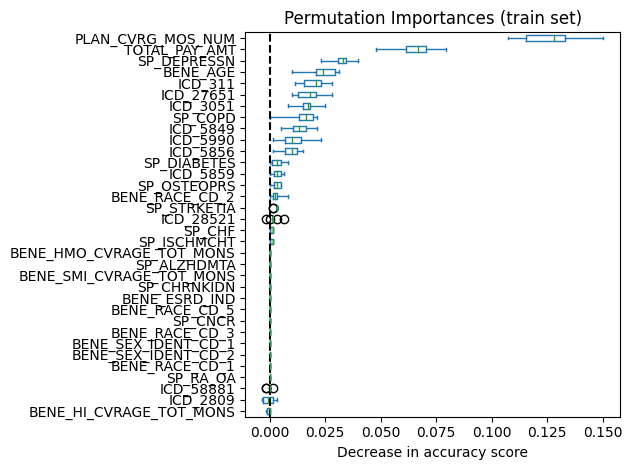

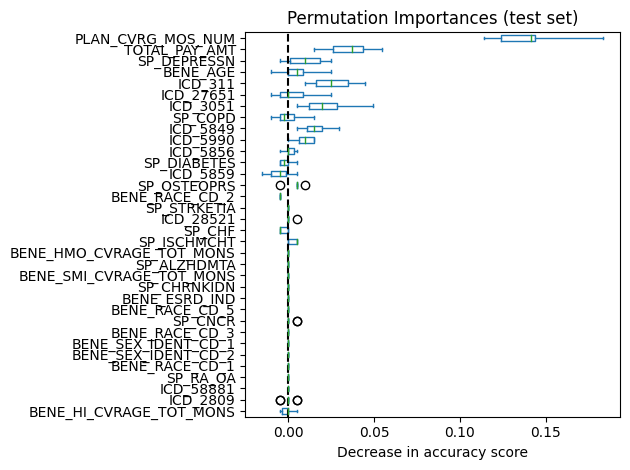

In [ ]:
from sklearn.inspection import permutation_importance
def plot_perm(clf):
    train_result = permutation_importance(
        clf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
    )
    test_results = permutation_importance(
        clf, X_val, y_val, n_repeats=10, random_state=42, n_jobs=2
    )
    sorted_importances_idx = train_result.importances_mean.argsort()
    train_importances = pd.DataFrame(
        train_result.importances[sorted_importances_idx].T,
        columns=X.columns[sorted_importances_idx],
    )
    test_importances = pd.DataFrame(
        test_results.importances[sorted_importances_idx].T,
        columns=X.columns[sorted_importances_idx],
    )
    for name, importances in zip(["train", "test"], [train_importances, test_importances]):
        ax = importances.plot.box(vert=False, whis=10)
        ax.set_title(f"Permutation Importances ({name} set)")
        ax.set_xlabel("Decrease in accuracy score")
        ax.axvline(x=0, color="k", linestyle="--")
        ax.figure.tight_layout()
plot_perm(xgb)

In [ ]:
# plt.barh(X.columns, xgb.feature_importances_)
# sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")


NameError: name 'sorted_idx' is not defined